# Анализ картографических данных и прогнозирование доминирующего вида лесного покрова

Получаем набор данных c https://www.kaggle.com/uciml/forest-cover-type-dataset, содержащий информацию о лесном покрове в четырех областях Roosevelt National Forest in Colorado (национальный лес, расположенный с северной части штата Колорадо, США)

Местность поделена на квадраты размером 30x30 метров и каждый характеризуется следующими параметрами:

    Elevation = Высота над уровнем моря (целое число)

    Aspect = Аспект в градусах по азимуту (целое число)

    Slope = Уклон в градусах (целое число)

    Horizontal_Distance_To_Hydrology = Горизонтальное расстояние до ближайших водных объектов (целое число)

    Vertical_Distance_To_Hydrology = Вертикальное расстояние до ближайших водных объектов (целое число)

    Horizontal_Distance_To_Roadways = Горизонтальное расстояние до ближайшей проезжей части (целое число).

    Hillshade_9am = Индекс тени холма в 9 часов утра, в день летнего солнцестояния (целое число 0..255)

    Hillshade_Noon = Индекс тени холма в полдень, в день летнего солнцестояния (целое число 0..255)

    Hillshade_3pm = Индекс тени холма в 3 часа дня, в день летнего солнцестояния (целое число 0..255)

    Horizontal_Distance_To_Fire_Point = Расстояние по горизонтали до ближайших точек возгорания пожаров (целое число)

    Wilderness_Area1 = Принадлежность Rawah Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area2 = Принадлежность Neota Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area3 = Принадлежность Comanche Peak Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area4 = Принадлежность Cache la Poudre Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Soil_Type1, Soil_Type2, ... , Soil_Type40 = тип почвы на квадрате (целое число: 1 - принадлежит, 0 - нет)

Последний параметр квадрата - Cover_Type, характеризующий доминирующий вид лесного покрова на квадрате. Задается целым числом от 1 до 7:
    
    1) Пихтовый лес
    2) Сосна скрученная
    3) Сосна жёлтая
    4) Тополь/Ива
    5) Осина
    6) Дугласова пихта
    7) Криволесье

Всего признаков - 55

## Ход решения

Импортируем необходимые модули

In [1]:
import pandas as pd
import numpy as np
import time
from math import fabs
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Импортируем данные с локального хранилища

In [2]:
data = pd.read_csv('covtype.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 55
Количество объектов: 581012


Проверим содержание и сгенерируем описательную статистику полученных данных:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Выводы:
   
    1) Пропусков в данных не выявлено

    2) Данные не нормализованы, что может стать помехой для некоторых алгоритмов

In [5]:
# import seaborn as sb
# import warnings
# warnings.filterwarnings('ignore')
# for index, col in enumerate(data.loc[:, :'Horizontal_Distance_To_Fire_Points']):
#     pyplot.figure(index)
#     sb.distplot(data[col])

Для начала уменьшим размерность.
Каждая запись в наборе данных имеет 40 столбцов для обозначения типа почвы. Более оптимальный вариант хранения - использовать один столбец, содержащий номер доминирующего вида почвы в виде дискретной целой величины, принимающей значения от 1 до 40:

In [6]:
optimized_data = data.drop(data.loc[:, 'Soil_Type1' : 'Soil_Type40'], axis = 1)
union_soil_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Soil_Type1' : 'Soil_Type40']):
    for item in np.where(data[col].values == 1):
        union_soil_data[item] = index + 1
optimized_data['Soil_Type'] = union_soil_data

Таким же образом поступим с Wilderness_Area1, Wilderness_Area2, Wilderness_Area3 и Wilderness_Area4:

In [7]:
optimized_data = optimized_data.drop(optimized_data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4'], axis = 1)
union_wilderness_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4']):
    for item in np.where(data[col].values == 1):
        union_wilderness_data[item] = index + 1
optimized_data['Wilderness'] = union_wilderness_data

Расстоние до источников воды также лучше мерить одним значением:

In [8]:
from math import sqrt
optimized_data = optimized_data.drop(optimized_data.loc[:, 'Horizontal_Distance_To_Hydrology' : 'Vertical_Distance_To_Hydrology'], axis = 1)
union_distance_data = pd.Series([0 for _ in range(len(data))])
for index in range(len(data)):
    union_distance_data[index] = sqrt(data['Horizontal_Distance_To_Hydrology'][index]**2 + data['Vertical_Distance_To_Hydrology'][index]**2)
optimized_data['Distance_To_Hydrology'] = union_distance_data

In [9]:
optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Roadways     581012 non-null  int64
 4   Hillshade_9am                       581012 non-null  int64
 5   Hillshade_Noon                      581012 non-null  int64
 6   Hillshade_3pm                       581012 non-null  int64
 7   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 8   Cover_Type                          581012 non-null  int64
 9   Soil_Type                           581012 non-null  int64
 10  Wilderness                          581012 non-null  int64
 11  Distance_To_Hydrology               581012 non-null 

In [10]:
optimized_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness,Distance_To_Hydrology
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471,24.362443,2.114462,275.659184
std,279.984734,111.913721,7.488242,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504,9.485405,1.061295,216.989552
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2809.000000,58.000000,9.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000,108.000000
50%,2996.000000,127.000000,13.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000,229.000000
75%,3163.000000,260.000000,18.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000,393.000000
max,3858.000000,360.000000,66.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,40.000000,4.000000,1418.000000


Для удобства переставим столбец Cover_Type:

In [11]:
optimized_data = optimized_data.drop(['Cover_Type'], axis = 1)
optimized_data['Cover_Type'] = data['Cover_Type']

Осталось нормализовать данные

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
optimized_normalized_data = optimized_data
t = mm_scaler.fit_transform(optimized_data[['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness']])
optimized_normalized_data[['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness']] = t

In [13]:
optimized_normalized_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,Distance_To_Hydrology,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.330216,0.835221,0.879208,0.561135,0.276076,0.599037,0.371487,0.194400,2.051471
std,0.140062,0.310871,0.113458,0.219089,0.105393,0.077830,0.150687,0.184608,0.243216,0.353765,0.153025,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.155403,0.779528,0.838583,0.468504,0.142758,0.487179,0.000000,0.076164,1.000000
50%,0.568784,0.352778,0.196970,0.280596,0.858268,0.889764,0.562992,0.238394,0.717949,0.333333,0.161495,2.000000
75%,0.652326,0.722222,0.272727,0.467613,0.909449,0.933071,0.661417,0.355500,0.769231,0.666667,0.277151,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Применим метод главных компонент:

In [14]:
from sklearn.decomposition import PCA
X = optimized_normalized_data.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)

Elevation  ->  0.35923320578356327
Aspect  ->  0.24161117635776394
Slope  ->  0.13196496267661362
Horizontal_Distance_To_Roadways  ->  0.07775059878236584
Hillshade_9am  ->  0.05467847786153076
Hillshade_Noon  ->  0.04508788960875242
Hillshade_3pm  ->  0.03840265490564868
Horizontal_Distance_To_Fire_Points  ->  0.029472342144870257
Soil_Type  ->  0.01484988590272334
Wilderness  ->  0.006852414718734682
Distance_To_Hydrology  ->  9.639125743315585e-05


Cover_Type1 - 211840 ~ 36.46%
Cover_Type2 - 283301 ~ 48.76%
Cover_Type3 - 35754 ~ 6.15%
Cover_Type4 - 2747 ~ 0.47%
Cover_Type5 - 9493 ~ 1.63%
Cover_Type6 - 17367 ~ 2.99%
Cover_Type7 - 20510 ~ 3.53%


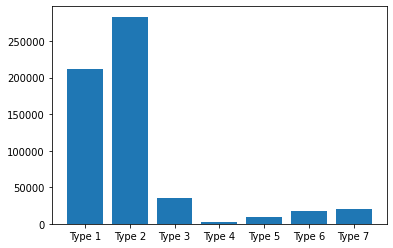

In [15]:
cover_type_values = data.Cover_Type.value_counts(sort=False)
pyplot.bar(["Type {}".format(i) for i in range(1, 8)], cover_type_values)
for index, value in enumerate(cover_type_values):
    print("Cover_Type{} - {} ~ {}%".format(index+1, value, "%.2f" % (value / len(data) * 100)))

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

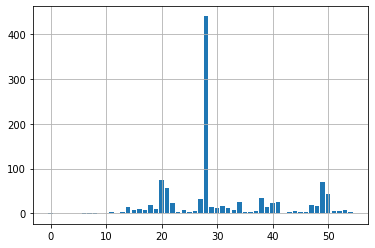

In [16]:
pyplot.grid(True)
pyplot.bar(range(len(data.columns)), data.skew())
data.skew()

In [17]:
# soil_data = [data[col_name].value_counts() for col_name in data.loc[:, "Soil_Type1" : "Soil_Type40"]]
# for soil_type, soil_num in enumerate(soil_data):
#     print("Soil_Type{}".format(soil_type + 1), soil_num[1])
# plt.grid(True)
# plt.bar(range(1, 41), [number[1] for _, number in enumerate(soil_data)])
# plt.show()

In [18]:
# barrier = 1000
# bad_soil_data = list(filter(lambda x: x[1] < barrier, soil_data))
# print(bad_soil_data)

In [19]:
# train = train.drop(['Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'], axis = 1)
# train.info()

In [20]:
from sklearn.model_selection import train_test_split

target = optimized_normalized_data.Cover_Type
train = optimized_normalized_data.drop(['Cover_Type'], axis = 1)
models_results = dict()

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

extraTreesClassifier_estimators = []
extraTreesClassifier_results = []
# estimators = 260
for estimators in range(10, 201, 10):
    trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)

#     start_time = time.time()
    trees.fit(x_train, y_train)
#     print("ExtraTreesClassifier{} train time = {} seconds".format(estimators, time.time() - start_time))

#     start_time = time.time()
    trees_result = trees.predict(x_test)
#     print("ExtraTreesClassifier{} predict time = {} seconds".format(estimators, time.time() - start_time))

#     start_time = time.time()
    extraTreesClassifier_accuracy = accuracy_score(y_test, trees_result)
#     print("ExtraTreesClassifier{} accuracy time = {} seconds".format(estimators, time.time() - start_time))
#     print("ExtraTreesClassifier{} accuracy: \n".format(estimators), extraTreesClassifier_accuracy)

    extraTreesClassifier_results.append(extraTreesClassifier_accuracy)
    extraTreesClassifier_estimators.append(estimators)

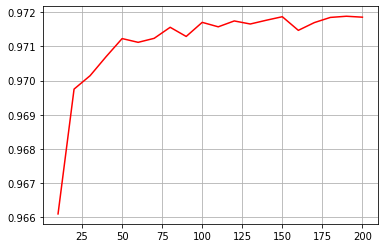

In [22]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_results, color="#FF0000", label="accuracy by estimators number")
pyplot.show()

In [23]:
print("Best accuracy: ", max(extraTreesClassifier_results))

Best accuracy:  0.9718835411316806


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_neighbors = []
knn_results = []
neighbors = 5
for neighbors in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
#     start_time = time.time()
    knn.fit(x_train, y_train)
#     print("KNeighborsClassifier{} train time = {} seconds".format(neighbors, time.time() - start_time))

#     start_time = time.time()
    knn_predict_result = knn.predict(x_test)
#     print("KNeighborsClassifier{} predict time = {} seconds".format(neighbors, time.time() - start_time))

#     start_time = time.time()
    accuracy = accuracy_score(y_test, knn_predict_result)
#     print("KNeighborsClassifier{} accuracy time = {} seconds".format(neighbors, time.time() - start_time))
#     print("KNeighborsClassifier{} accuracy".format(neighbors), ": ", accuracy)

    knn_neighbors.append(neighbors)
    knn_results.append(accuracy)

In [25]:
for index in range(len(knn_neighbors)):
    print("Neighbors={}, accuracy={}".format(knn_neighbors[index], knn_results[index]))

Neighbors=1, accuracy=0.933949729093375
Neighbors=2, accuracy=0.9224112410759158
Neighbors=3, accuracy=0.9316847156341005
Neighbors=4, accuracy=0.9250273660440749
Neighbors=5, accuracy=0.9266590018794792
Neighbors=6, accuracy=0.9224525483122552
Neighbors=7, accuracy=0.9224181256153057
Neighbors=8, accuracy=0.919340736508024
Neighbors=9, accuracy=0.9179638286300456
Neighbors=10, accuracy=0.9151067447832403
Neighbors=11, accuracy=0.9134957625660055
Neighbors=12, accuracy=0.9111550191734422
Neighbors=13, accuracy=0.9100259547134999
Neighbors=14, accuracy=0.9079192856601929
Neighbors=15, accuracy=0.9068452975153697
Neighbors=16, accuracy=0.9049658182619292
Neighbors=17, accuracy=0.9040639436018533
Neighbors=18, accuracy=0.9024460768452287
Neighbors=19, accuracy=0.9007249419977557
Neighbors=20, accuracy=0.8994650712894053
Neighbors=21, accuracy=0.8976337838116941
Neighbors=22, accuracy=0.8961604923822571
Neighbors=23, accuracy=0.8944324729953942
Neighbors=24, accuracy=0.8933653693899609
Nei

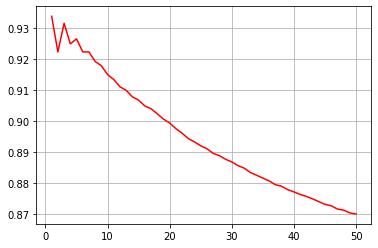

In [26]:
pyplot.grid(True)
pyplot.plot(knn_neighbors, knn_results, color="#FF0000", label="accuracy by neighbors number")
pyplot.show()

In [27]:
import xgboost

xgboost_model = xgboost.XGBClassifier()
start_time = time.time()
xgboost_model.fit(x_train, y_train)
print("XGBClassifier train time = {} seconds".format(time.time() - start_time))

XGBClassifier train time = 63.58207178115845 seconds


In [28]:
start_time = time.time()
xgboost_result = xgboost_model.predict(x_test)
print("XGBoost predict time = {} seconds".format(time.time() - start_time))

start_time = time.time()
xgboost_model_accuracy = accuracy_score(y_test, xgboost_result)
print("XGBoost accuracy time = {} seconds".format(time.time() - start_time))
print("XGBoost accuracy: ", xgboost_model_accuracy)

XGBoost predict time = 0.9018187522888184 seconds
XGBoost accuracy time = 0.008007287979125977 seconds
XGBoost accuracy:  0.8681404170653962


In [29]:
from sklearn.ensemble import RandomForestClassifier


randomForestClassifier_estimators = []
randomForestClassifier_results = []
for estimators in range(10, 201, 10):
    randomForestClassifier = RandomForestClassifier(n_estimators = estimators, max_features=10)
#     start_time = time.time()
    randomForestClassifier.fit(x_train, y_train)
#     print("RandomForestClassifier train time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
    randomForest_result = randomForestClassifier.predict(x_test)
#     print("RandomForestClassifier predict time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
    randomForest_accuracy = accuracy_score(y_test, randomForest_result)
#     print("RandomForestClassifier accuracy time = {} seconds".format(time.time() - start_time))
#     print("RandomForestClassifier accuracy: ", randomForest_accuracy)
    
    randomForestClassifier_estimators.append(estimators)
    randomForestClassifier_results.append(randomForest_accuracy)

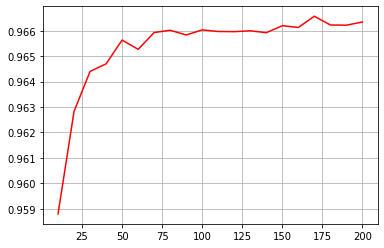

In [30]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_results, color="#FF0000", label="accuracy by estimators number")
pyplot.show()

In [31]:
print("Best accuracy: ", max(randomForestClassifier_results))

Best accuracy:  0.9665686767226839


In [32]:
# from sklearn.svm import SVC

# svclassifier = SVC(kernel='linear')
# start_time = time.time()
# svclassifier.fit(x_train, y_train)
# print("SVC linear train time = {} seconds".format(time.time() - start_time))

In [33]:
# start_time = time.time()
# print("SVC accuracy: ", accuracy_score(y_test, [round(item) for item in svclassifier.predict(x_test)]))
# print("SVC accuracy time = {} seconds".format(time.time() - start_time))

In [34]:
# start_time = time.time()
# print("SVC score: ", svclassifier.score(x_test, y_test))
# print("SVC score time = {} seconds".format(time.time() - start_time))

In [35]:
# data.corr()

In [36]:
# corr_data = data.corr()
# for coll in corr_data.columns:
#     print(coll, ":")
#     coll_data = corr_data[coll].values
#     print(list(filter(lambda x: fabs(x) > 0.6, coll_data)))

In [37]:
# All correlations (pearson):

# Wilderness_Area4 ~ Elevation, 
# Aspect ~ Hillshade_3pm,
# Horizontal_Distance_To_Hydrology ~ Vertical_Distance_To_Hydrology,
# Hillshade_9am ~ Hillshade_3pm,
# Wilderness_Area1 ~ Wilderness_Area3

In [38]:
# corr_data = data.corr(method='spearman')
# for coll in corr_data.columns:
#     print(coll, ":")
#     coll_data = corr_data[coll].values
#     print(list(filter(lambda x: fabs(x) > 0.6, coll_data)))

In [39]:
# - Wilderness_Area4 ~ Elevation

In [40]:
# corr_data = data.corr(method='kendall')
# for coll in corr_data.columns:
#     print(coll, ":")
#     coll_data = corr_data[coll].values
#     print(list(filter(lambda x: fabs(x) > 0.6, coll_data)))

In [41]:
# - Wilderness_Area4 ~ Elevation, 
# - Aspect ~ Hillshade_3pm,
# - Horizontal_Distance_To_Hydrology ~ Vertical_Distance_To_Hydrology

In [42]:
# train = data.drop(['Cover_Type', 'Hillshade_3pm', 'Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'], axis = 1)
# train.info()

In [43]:
# x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

In [44]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_neighbors = []
# knn_results = []
# neighbors = 5
# # for neighbors in range(1, 51):
# knn_neighbors.append(neighbors)
# knn = KNeighborsClassifier(n_neighbors=neighbors)
# start_time = time.time()
# knn.fit(x_train, y_train)
# print("KNeighborsClassifier{} train time = {} seconds".format(neighbors, time.time() - start_time))

# start_time = time.time()
# knn_predict_result = knn.predict(x_test)
# print("KNeighborsClassifier{} predict time = {} seconds".format(neighbors, time.time() - start_time))

# start_time = time.time()
# accuracy = accuracy_score(y_test, knn_predict_result)
# print("KNeighborsClassifier{} accuracy time = {} seconds".format(neighbors, time.time() - start_time))
# print("KNeighborsClassifier{} accuracy".format(neighbors), ": ", accuracy)

# knn_results.append(accuracy)

In [45]:
print(data)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1        

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# mm_scaler = MinMaxScaler()
# normalized_data = data
# t = mm_scaler.fit_transform(normalized_data[['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Slope', 'Horizontal_Distance_To_Fire_Points', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']])
# normalized_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']] = t
# # train = data[[]]

In [47]:
# normalized_data.describe()

In [48]:
# useless_data = ['Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37', 'Hillshade_3pm', 'Cover_Type']
# target = normalized_data.Cover_Type
# train = normalized_data.drop(useless_data, axis = 1)

In [49]:
# train.info()

In [50]:
# print(target)
# x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

In [51]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_neighbors = []
# knn_results = []
# neighbors = 5
# # for neighbors in range(1, 51):
# knn_neighbors.append(neighbors)
# knn = KNeighborsClassifier(n_neighbors=neighbors)
# start_time = time.time()
# knn.fit(x_train, y_train)
# print("KNeighborsClassifier{} train time = {} seconds".format(neighbors, time.time() - start_time))

# start_time = time.time()
# knn_predict_result = knn.predict(x_test)
# print("KNeighborsClassifier{} predict time = {} seconds".format(neighbors, time.time() - start_time))

# start_time = time.time()
# accuracy = accuracy_score(y_test, knn_predict_result)
# print("KNeighborsClassifier{} accuracy time = {} seconds".format(neighbors, time.time() - start_time))
# print("KNeighborsClassifier{} accuracy".format(neighbors), ": ", accuracy)

# knn_results.append(accuracy)

In [52]:
# from sklearn.ensemble import ExtraTreesClassifier

# extraTreesClassifier_estimators = []
# extraTreesClassifier_results = []
# # estimators = 260
# estimators = 100
# # for estimators in range(10, 301, 10):
# trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)

# start_time = time.time()
# trees.fit(x_train, y_train)
# print("ExtraTreesClassifier{} train time = {} seconds".format(estimators, time.time() - start_time))

# start_time = time.time()
# trees_result = trees.predict(x_test)
# print("ExtraTreesClassifier{} predict time = {} seconds".format(estimators, time.time() - start_time))

# start_time = time.time()
# extraTreesClassifier_accuracy = accuracy_score(y_test, trees_result)
# print("ExtraTreesClassifier{} accuracy time = {} seconds".format(estimators, time.time() - start_time))
# print("ExtraTreesClassifier{} accuracy: \n".format(estimators), extraTreesClassifier_accuracy)

# extraTreesClassifier_results.append(extraTreesClassifier_accuracy)
# extraTreesClassifier_estimators.append(estimators)

In [53]:
# from sklearn.ensemble import ExtraTreesClassifier

# extraTreesClassifier_estimators = []
# extraTreesClassifier_results = []
# # estimators = 260
# estimators = 100
# # for estimators in range(10, 301, 10):
# trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)

# start_time = time.time()
# trees.fit(x_train, y_train)
# print("ExtraTreesClassifier{} train time = {} seconds".format(estimators, time.time() - start_time))

# start_time = time.time()
# trees_result = trees.predict(x_test)
# print("ExtraTreesClassifier{} predict time = {} seconds".format(estimators, time.time() - start_time))

# start_time = time.time()
# extraTreesClassifier_accuracy = accuracy_score(y_test, trees_result)
# print("ExtraTreesClassifier{} accuracy time = {} seconds".format(estimators, time.time() - start_time))
# print("ExtraTreesClassifier{} accuracy: \n".format(estimators), extraTreesClassifier_accuracy)

# extraTreesClassifier_results.append(extraTreesClassifier_accuracy)
# extraTreesClassifier_estimators.append(estimators)

In [54]:
# import xgboost

# xgboost_model = xgboost.XGBClassifier()
# start_time = time.time()
# xgboost_model.fit(x_train, y_train)
# print("XGBClassifier train time = {} seconds".format(time.time() - start_time))

In [55]:
# start_time = time.time()
# xgboost_result = xgboost_model.predict(x_test)
# print("XGBoost predict time = {} seconds".format(time.time() - start_time))

# start_time = time.time()
# xgboost_model_accuracy = accuracy_score(y_test, xgboost_result)
# print("XGBoost accuracy time = {} seconds".format(time.time() - start_time))
# print("XGBoost accuracy: ", xgboost_model_accuracy)

In [56]:
# from sklearn.ensemble import RandomForestClassifier


# randomForestClassifier_estimators = []
# randomForestClassifier_results = []
# # estimators = 100
# for estimators in range(10, 301, 10):
#     randomForestClassifier = RandomForestClassifier(n_estimators = estimators, max_features=10)
#     start_time = time.time()
#     randomForestClassifier.fit(x_train, y_train)
#     print("RandomForestClassifier train time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
#     randomForest_result = randomForestClassifier.predict(x_test)
#     print("RandomForestClassifier predict time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
#     randomForest_accuracy = accuracy_score(y_test, randomForest_result)
#     print("RandomForestClassifier accuracy time = {} seconds".format(time.time() - start_time))
#     print("RandomForestClassifier accuracy: ", randomForest_accuracy)

#     randomForestClassifier_estimators.append(estimators)
#     randomForestClassifier_results.append(randomForest_accuracy)

In [57]:
# pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_results)

In [58]:
# from sklearn.decomposition import PCA
# X = normalized_data.drop(['Cover_Type'], axis=1)
# pca = PCA(n_components=len(X.columns))
# pca.fit(X)

In [59]:
# for index, item in enumerate(pca.explained_variance_ratio_):
#     print(normalized_data.columns[index], " - %.4f" % item)
# print(sum(pca.explained_variance_ratio_[13:]))

In [60]:
# for row in data.loc[:, 'Soil_Type1' : 'Soil_Type40']:
#     print(row)

In [61]:
# exist_data = data.drop(data.loc[:, 'Soil_Type1' : 'Soil_Type40'], axis = 1)
# soil_data = data.drop(exist_data.loc[:, :], axis = 1)
# union_soil_data = pd.Series([0 for _ in range(len(data))])
# index = 1
# for col in soil_data.loc[:, :]:
#     for item in np.where(data[col].values == 1):
#         union_soil_data[item] = index
#     index += 1
# print(union_soil_data)

In [62]:
# # for index, item in enumerate(data.loc[:, 'Horizontal_Distance_To_Hydrology' : 'Vertical_Distance_To_Hydrology']):
# #     print(index)

# print(data['Horizontal_Distance_To_Hydrology'][581008])
# print(data['Vertical_Distance_To_Hydrology'][581008])